#  Machine-Learning Pipeline Implementation

## Introduction

For telecommunication companies, it is key to attract new customers and at the same time avoid contract terminations (i.e., churn) to grow their revenue generating base. Looking at churn, different reasons trigger customers to terminate their contracts, such as better price offers, more interesting packages, bad service experiences or change of customers’ personal situations. Churn analytics provides valuable capabilities to predict customer churn and also define the underlying reasons that drive it. With this in mind, telecommunication companies might decide to apply machine learning models to predict churn on an individual customer basis and take counter measures, such as discounts, special offers or other gratifications to keep their customers. Therefore, in this homework, we will imagine that a company asks you to predict whether its customers are about to churn by means of a machine-learning approach. 

Specifically,  we will ask you to:

Load and explore the data appropriately, based on the task and application (what is important?). 

Implement and evaluate a machine-learning approach appropriately, based on the task and data set (e.g., size). 



## The Data Set

This sample data tracks a fictional telco company's customer churn based on a variety of possible factors. Specifically, the `data` folder includes CSV files pertaining to customer's demographic attributes, contract information, and monthly service-related data. Each file is characterized by the following attributes. 

**customer.csv**

| Name                   | Description                         |
| ---------------------- | ------------------------------------------------------------ |
| CustomerID | A unique ID that identifies each customer.  | 
| Gender |  The customer’s gender: Male, Female  | 
| SeniorCitizen | Indicates if the customer is 65 or older: 0, 1.  | 
| Partner |  Indicates if the customer is married: Yes, No | 
| Dependents | Indicates if the customer lives with any dependents: Yes, No.  |  
| PaperlessBilling | Indicates if the customer has chosen paperless billing: Yes, No.  | 
| PaymentMethod |  Indicates how the customer pays their bill: Mailed check, Electronic check, Credit card, Bank transfer.  | 

**contract.csv**

| Name                   | Description                         |
| ---------------------- | ------------------------------------------------------------ |
| ContractID |  A unique ID that identifies each contract.  | 
| CustomerID |  A unique ID that identifies each customer.  | 
| Contract |  Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.  | 
| StartDate |  Start date of the contract. | 

**churn.csv**

| Name                   | Description                         |
| ---------------------- | ------------------------------------------------------------ |
| CustomerID | A unique ID that identifies each customer.   | 
| Churn | 1 = the customer left the company. 0 = the customer remained with the company.  | 

**phone_usage.csv**

| Name                   | Description                         |
| ---------------------- | ------------------------------------------------------------ |
| ContractID | A unique ID that identifies each contract.  | 
| Date | The reference period for the monthly usage indicated by this record for this ContractID.  | 
| MonthlyUsage | Indicates the customer’s monthly usage for the phone.  | 

**services.csv**

| Name                   | Description                         |
| ---------------------- | ------------------------------------------------------------ |
| ContractID | A unique ID that identifies each contract.  | 
| ServiceValue | The specific service value of type Service the contract has. No = the customer does not have that Service.   | 
| Service | A string label identifying a type of service offered by the company: PhoneService, InternetService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies.   | 

**charges.csv**

| Name                   | Description                         |
| ---------------------- | ------------------------------------------------------------ |
| ContractID |  A unique ID that identifies each contract. | 
| Date | The billing date for the monthly usage indicated by this record for this ContractID.   | 
| Charge | Indicates the contract’s monthly charge.  | 

In [1]:
#### PACKAGE IMPORTS ####

# Run this cell first to import all required packages. Do not make any imports elsewhere in the notebook. 

### Traditional packages
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import pandas as pd
import numpy as np
import datetime
import math
import time

### Scikit-learn packages
from sklearn import preprocessing, model_selection, ensemble, metrics
from sklearn.dummy import DummyClassifier
from sklearn.base import clone

### Call for matplotlib customization
sns.set_style("whitegrid", {'axes.grid' : True})
%matplotlib inline

<a id="section1"></a>
## 1  Load and explore the data appropriately. 
----

In this section, you should:
1. Combine and look at the features in customer.csv and contract.csv, and connect them to their potential influence on customer churn. 
2. Extend the feature set with behavioral features you will create from phone_usage.csv, services.csv, and charges.csv.  

In [2]:
# Files with one record per customer / contract
customer = pd.read_csv('./data/customer.csv')
contract = pd.read_csv('./data/contract.csv')
churn = pd.read_csv('./data/churn.csv')

# Files with one record per customer / contract over months
phone_usage = pd.read_csv('./data/phone_usage.csv')
services = pd.read_csv('./data/services.csv')
charges = pd.read_csv('./data/charges.csv')

<a id="section1.1"></a>
### Task 1.1 

From the above descriptive tables, you have seen that customers' information is distributed in different files. Three of these files, `customer.csv`, `contract.csv`, and `churn.csv`, include one record per customer / contract. Therefore, we first ask you to:
- Combine the first two dataframes (customer and contract) in a single dataframe entitled `X`.
- Copy the third dataframe in a dataframe entitled `y`.
- Conduct an exploratory analysis on `X`, supported by appropriate visualizations, to relate the values of these features to their potential influence on the customer churn `y` (e.g., how the dependents are related with the churn target).
- Think of and write down your hypotheses on the extent to which each feature in `X` can be related to the fact that the customer drops the company; the churn target is indicated in `y` (e.g., customers with a high number of dependants drop less the company).    

Combine the first two dataframes (customer and contract) in a single dataframe entitled X.

In [3]:
X = pd.merge(customer, contract, on=['CustomerID'])

In [4]:
X.sample(n=10)

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,PaymentMethod,ContractID,Contract,StartDate
6938,9840-EFJQB,Female,0,No,No,No,Electronic check,KG8YpyXPEt,Month-to-month,2019-12-01
4654,6568-POCUI,Female,0,Yes,No,Yes,Credit card (automatic),EYJa9mimp2,Two year,2016-04-01
812,1184-PJVDB,Male,0,Yes,No,Yes,Electronic check,EbLfeEwwwW,Month-to-month,2019-09-01
4018,5666-CYCYZ,Female,0,No,No,Yes,Electronic check,BSfx2XmWKk,Month-to-month,2018-01-01
2087,2995-UPRYS,Female,1,Yes,No,Yes,Credit card (automatic),BgGybR8RZs,One year,2017-06-01
1241,1839-UMACK,Male,0,No,No,No,Electronic check,BHziGekgKx,One year,2016-07-01
120,0208-BPQEJ,Female,0,Yes,Yes,No,Bank transfer (automatic),G5jbvekJFT,Month-to-month,2019-01-01
5809,8180-AKMJV,Female,0,No,No,Yes,Credit card (automatic),E4DHpkBMz6,Month-to-month,2019-12-01
2492,3567-PQTSO,Male,0,Yes,Yes,Yes,Electronic check,6CotHtiCWA,One year,2015-08-01
4254,5995-SNNEW,Male,1,Yes,No,Yes,Electronic check,5vD9LGA3xW,Month-to-month,2018-02-01


Copy the third dataframe in a dataframe entitled y.

In [5]:
y = churn.copy()

In [6]:
y.sample(n=10)

,CustomerID,Churn
2100,3011-WQKSZ,0
72,0117-LFRMW,1
5728,8064-RAVOH,0
1292,1925-LFCZZ,0
3494,4950-BDEUX,0
6776,9620-QJREV,0
129,0221-WMXNQ,0
5408,7619-PLRLP,0
3792,5334-AFQJB,0
1252,1852-QSWCD,0


In [7]:
# get the categorical features
categorical_features = X.select_dtypes(include=['object']).columns
# get the numerical features
numerical_features = X.select_dtypes(exclude=['object']).columns
display(categorical_features, numerical_features)

Index(['CustomerID', 'Gender', 'Partner', 'Dependents', 'PaperlessBilling',
       'PaymentMethod', 'ContractID', 'Contract', 'StartDate'],
      dtype='object')

Index(['SeniorCitizen'], dtype='object')

In [8]:
continuous_cols = [col for col in X._get_numeric_data().columns]
categorical_cols = list(set(X.columns) - set(continuous_cols))

display(categorical_cols,continuous_cols)

['PaperlessBilling',
 'Contract',
 'ContractID',
 'PaymentMethod',
 'Partner',
 'Gender',
 'CustomerID',
 'StartDate',
 'Dependents']

['SeniorCitizen']

Conduct an exploratory analysis on X to relate the values of these features to their influence on the customer churn y.

In [56]:
def plot_features(df):
    '''
    For each feature in df, create a plot that shows the percentage of churn (1) or not chrun (0) for each feature value. 
    :param df: A dataframe including one column per feature and the target column 'Churn'.  
    :return: None. 
    '''
    
    # Identify and group features based on their type: numerical and categorical
    continuous_cols = [col for col in df._get_numeric_data().columns if df[col].nunique() != 2]
    categorical_cols = list(set(df.columns) - set(continuous_cols))

    # Create a plot grid of shape (n_features // 2, 2), with one plot per feature
    fig, axes = plt.subplots(len(df.columns)//2, 2, figsize=(15,15))
    
    # For each feature in the dataframe df, create a plot to relate the values of that feature with the 'Churn' target 
    for i, col in enumerate(df.drop('Churn', axis=1).columns):   
        
        # Select the axis the plot will be added
        ax = axes[i // 2, i % 2]
            
        # For each unique feature value, count the percentage of churn (1) and not chrun (0)
        col_counts = df.groupby(by=col)['Churn'].value_counts(normalize=True).rename('Percentage').mul(100)
        col_counts = col_counts.reset_index().sort_values(col)
        display(col_counts)                   

        # Show a bar plot if the feature is categorical, a histogram otherwise
        if col in categorical_cols:  
            g = sns.barplot(data=col_counts, x=col, y='Percentage', hue='Churn', ax=ax)
            g.legend(loc='upper right', ncol=2)
            g.set_title(f'{col} Bar distribution')
            g.set(ylim=(0., 100.))
        else:
            g = sns.kdeplot(data=df, x=col, hue='Churn', ax=ax)
            g.set_title(f'{col} KDE distribution')
            g.set(xlim=(0., None))
        
        # If the feature is a date, reduce the number of xticks appropriately
        if 'Date' in col:
            xticks = ax.get_xticks()[::6] # One tick every six months, what is [::6]? Answer: https://stackoverflow.com/questions/509211/understanding-slice-notation, i.e. [start:stop:step]
            xlabels = ax.get_xticklabels()[::6] # One tick every six months
            ax.set_xticks(xticks) 
            ax.set_xticklabels(xlabels, rotation=45)
            
    # In case the number of feature is even, remove the last empty plot
    if (len(df.columns) - 1) % 2 != 0:
        fig.delaxes(axes[len(df.columns) // 2-1][1])
        
    fig.tight_layout()
    plt.show()

,Gender,Churn,Percentage
0,Female,0,73.079128
1,Female,1,26.920872
2,Male,0,73.839662
3,Male,1,26.160338


,SeniorCitizen,Churn,Percentage
0,0,0,76.393832
1,0,1,23.606168
2,1,0,58.318739
3,1,1,41.681261


,Partner,Churn,Percentage
0,No,0,67.042021
1,No,1,32.957979
2,Yes,0,80.335097
3,Yes,1,19.664903


,Dependents,Churn,Percentage
0,No,0,68.720860
1,No,1,31.279140
2,Yes,0,84.549763
3,Yes,1,15.450237


,PaperlessBilling,Churn,Percentage
0,No,0,83.669916
1,No,1,16.330084
2,Yes,0,66.434908
3,Yes,1,33.565092


,PaymentMethod,Churn,Percentage
0,Bank transfer (automatic),0,83.290155
1,Bank transfer (automatic),1,16.709845
2,Credit card (automatic),0,84.756899
3,Credit card (automatic),1,15.243101
4,Electronic check,0,54.714588
5,Electronic check,1,45.285412
6,Mailed check,0,80.893300
7,Mailed check,1,19.106700


,Contract,Churn,Percentage
0,Month-to-month,0,57.290323
1,Month-to-month,1,42.709677
2,One year,0,88.730482
3,One year,1,11.269518
4,Two year,0,97.168142
5,Two year,1,2.831858


,StartDate,Churn,Percentage
0,2014-01-01,0,100.000000
1,2014-02-01,0,100.000000
2,2014-03-01,0,99.082569
3,2014-03-01,1,0.917431
4,2014-04-01,0,97.752809
...,...,...,...
149,2020-07-01,1,100.000000
150,2020-08-01,1,100.000000
151,2020-09-01,1,100.000000
152,2020-10-01,1,100.000000


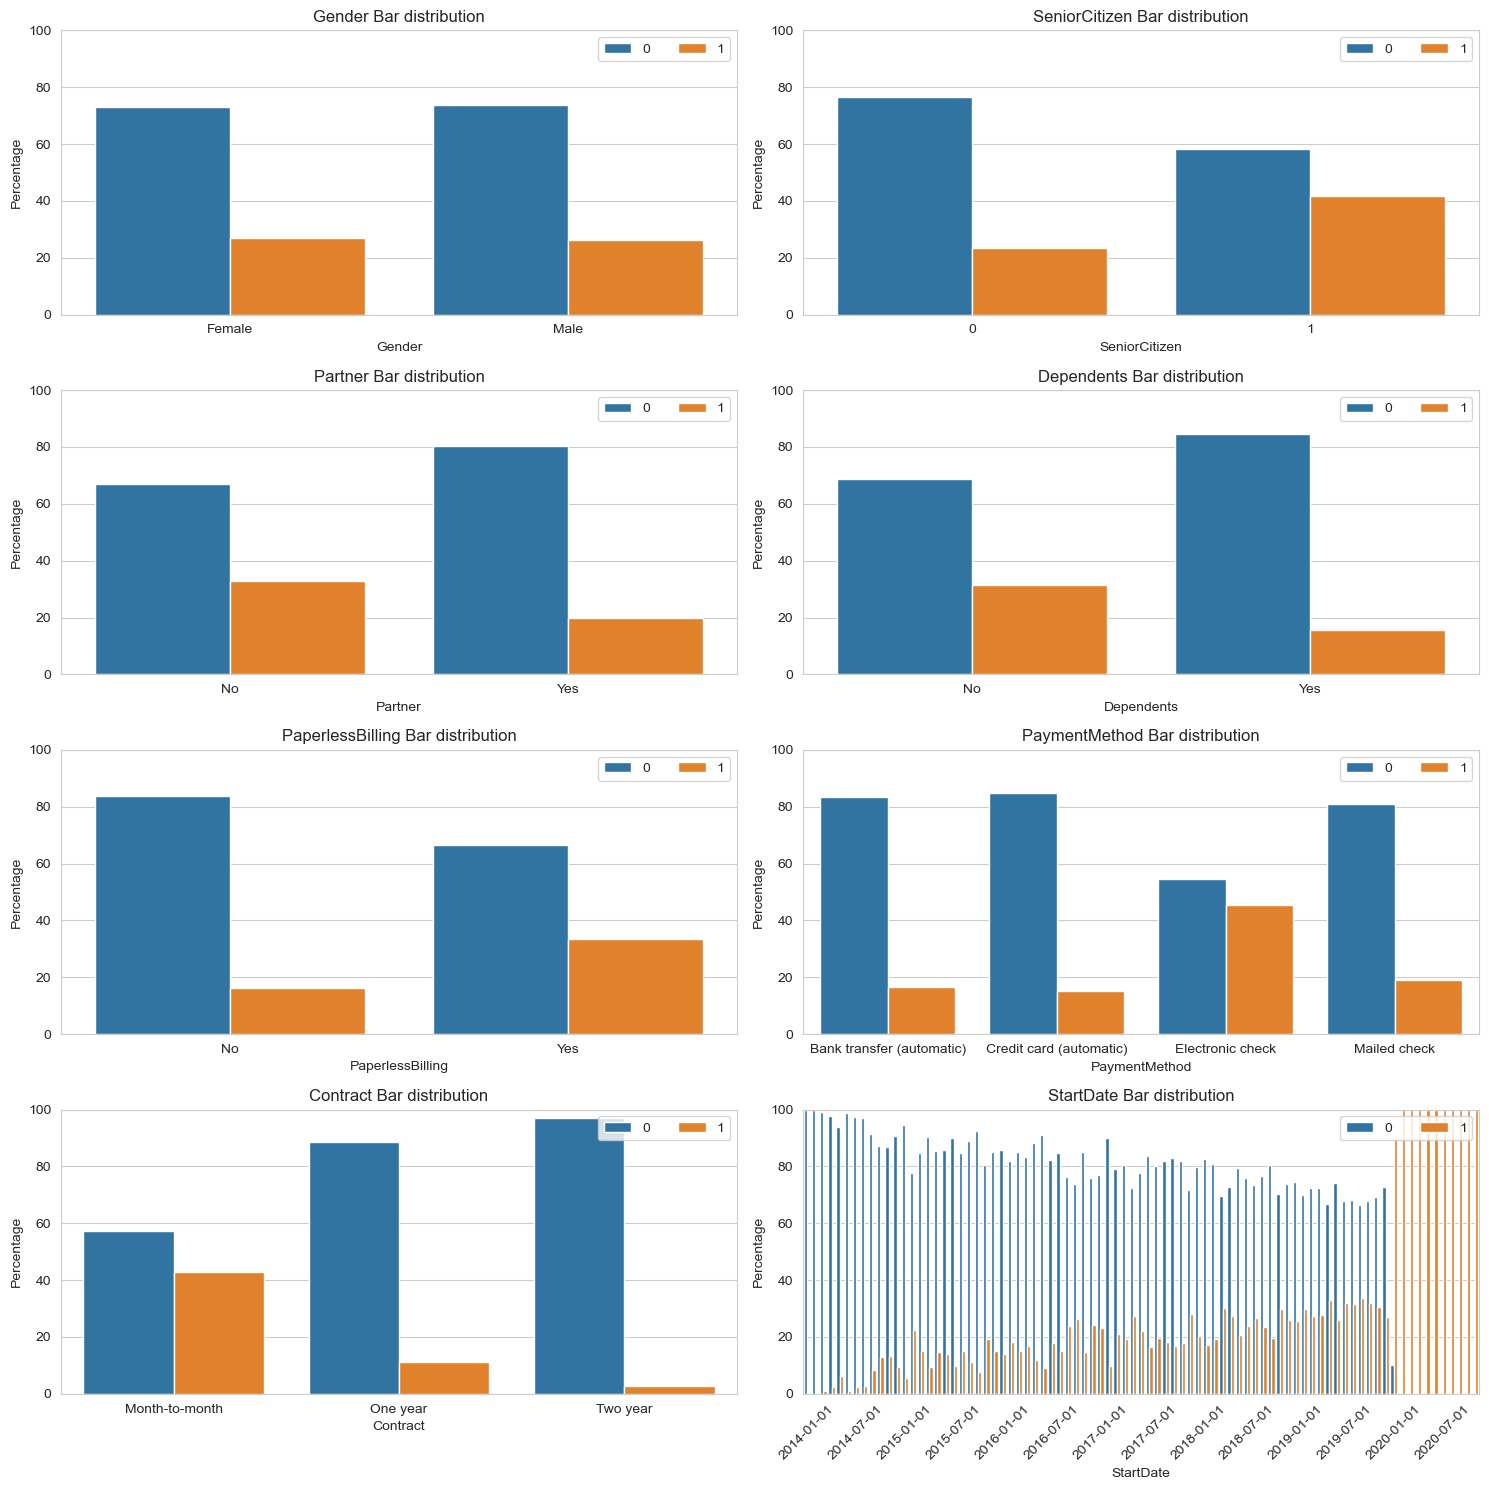

In [57]:
plot_features(X.merge(y, on='CustomerID').drop(['ContractID', 'CustomerID' ], axis=1))

<font color='green'> 
    
### 1.1 Please, describe, motivate, and discuss your explorations and hypotheses 
    
In order to relate the values of these demographic features to their potential influence on the customer churn, we created a grid of plots including one plot per feature. Specifically, for each value of the feature under consideration, the plot reported the percentage of customers, characterized by that feature value, who have dropped (not dropped) of the company (orange and blue bars, respectively). To ensure an appropriate level of interpretability of the numbers shown in the plot, we decided to use the percentages (not the absolute values), and we configured the same minimum and maximum limits for the y-axis across plots. 
    
**Discuss:**
    
Based on the plots, we can observe that:    

- Female and male customers tend to have same rate of dropping the service. 
- Customers older than 65 have a higher rate of dropping. 
- Customers who are not married are more likely of dropping. 
- Non-dependence customers have a higher rate of dropping. 
- People who opted for paperless billing have a higher tendency of dropping.
- Customers who opted for electronic check have a higher rate of dropping.
- Customers who decided to have a month-to-month contract are more likely to drop.
- Customers who recently subscribed their contract show a higher rate of dropping. 

**Hypotheses:**

The above observations allow us to make some hypotheses on circumstances related with the churn event, as those exemplified below:    
    
- Techonology-oriented: it looks like customers that are more familiar, or at least make more use, of technology are more prone to churn. That is denoted by the number of churning customers who use electronic check as payment method and paperless billing.
- Not-settled: customers who are not engaged in anything particularly seem to churn more more frequently. One of the features supporting this hypothesis is the contract type: month-to-month-paying customers show the highest churn rate. Logically such contracts are the easiest to end. 
- Independent-person: it seems that customers who are generally more independent have a higher chance of dropping. This is evident when we consider the dropping rates of customers who are not married and/or those who have no dependence. </font>

<a id="section1.2"></a>
### Task 1.2

While demographic information is important, it does not reveal how customers actually used the services. Therefore, we now ask you extend the current set of features for each customer with novel behavioral features derived from the services the customers subscribed to, the extent to which they are charged monthly, and the actual phone usage. To this end, you will need to play with the files `phone_usage.csv`, `services.csv`, and `charges.csv`, and their corresponding dataframes. Specifically, we ask you to:
- Create, in total, at least **5 novel behavioral features**. They can come from the phone usage, the services, and/or the charges.
- Include these novel features to `X` you prepared in the previous task. 
- Explore how these novel features in `X` relate to the churn in `y` (e.g., how the number of services the customer subscribed to is related with the churn). 
- Think of and write down your hypotheses on the extent to which each **novel** feature in `X` can be related to the fact that the customer drops the company; the churn target is indicated in `y` (e.g., customers with a lower number of services drop more the company).   

Create, in total, at least 5 novel behavioral features. They can come from the phone usage, the services, and/or the charges.

In [18]:
avg_charge = charges.groupby('ContractID').mean().rename(columns={'Charge': 'AvgCharge'}).reset_index()

avg_phone_usage = phone_usage.groupby('ContractID').mean().rename(columns={'MonthlyUsage': 'AvgUsage'}).reset_index()

extreme_charge = (charges.groupby('ContractID').max().Charge - charges.groupby('ContractID').mean().Charge).reset_index().rename(columns={'Charge': 'ExtremeCharge'})

mapping_charging_length = lambda x: 'Less than one year' if x < 12 else ('Between one and three years' if x >= 12 and x <= 36 else 'More than three years')
charging_length = charges.groupby('ContractID').size().apply(mapping_charging_length).to_frame().rename(columns={0: 'ChargingLength'}).reset_index()
                
nb_service = services[~services.ServiceValue.str.contains('No')].groupby('ContractID').size().to_frame().rename(columns={0: 'NbServices'}).reset_index()

/var/folders/75/94jyvgc92_gcwmzgrg36xfd00000gn/T/ipykernel_22073/2675082356.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_charge = charges.groupby('ContractID').mean().rename(columns={'Charge': 'AvgCharge'}).reset_index()
/var/folders/75/94jyvgc92_gcwmzgrg36xfd00000gn/T/ipykernel_22073/2675082356.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg_phone_usage = phone_usage.groupby('ContractID').mean().rename(columns={'MonthlyUsage': 'AvgUsage'}).reset_index()
/var/folders/75/94jyvgc92_gcwmzgrg36xfd00000gn/T/ipykernel_22073/2675082356.py:5: FutureWarning: The default value of numeric_only in Da

In [19]:
df_new = avg_charge.merge(avg_phone_usage).merge(extreme_charge).merge(charging_length).merge(nb_service, how='outer').fillna({'AvgCharge': 0, 'AvgUsage': 0, 'ExtremeCharge': 0, 'ChargingLength': 'Less than one year', 'NbServices': 0})

In [20]:
df_new.sample(n=10)

,ContractID,AvgCharge,AvgUsage,ExtremeCharge,ChargingLength,NbServices
3652,ChBZpQF8t5,19.957407,818.213296,3.692593,More than three years,1
5571,HZ2nyWiCBt,21.338889,1956.369333,3.911111,Less than one year,1
5380,H6qsVuSsZN,91.027027,219.944189,15.572973,More than three years,8
921,5SDCGbnNBq,87.811972,2342.386873,17.338028,More than three years,8
6889,5PdG3EUbxj,0.000000,0.000000,0.000000,Less than one year,3
200,3WYgXabMQE,67.287324,367.364901,12.812676,More than three years,7
6257,KFU3yftFvL,80.050000,3913.009000,0.000000,Less than one year,3
4040,DiRAq9ndwq,56.470000,5149.490000,9.230000,Less than one year,4
3837,D9NWEVMA2R,93.698980,2198.028245,18.451020,More than three years,5
2017,8GaCURrGnV,98.025000,4272.115125,17.975000,Between one and three years,5


Explore how these novel features in X relate to the churn in y. 

,AvgCharge,Churn,Percentage
0,0.000000,1,93.785311
1,0.000000,0,6.214689
2,18.750000,0,100.000000
3,18.800000,0,100.000000
4,18.925000,0,100.000000
...,...,...,...
6480,123.705882,0,100.000000
6481,123.895455,1,100.000000
6482,123.975000,1,100.000000
6483,124.585294,0,100.000000


,AvgUsage,Churn,Percentage
0,0.000000,1,93.989071
1,0.000000,0,6.010929
2,0.140000,0,100.000000
3,0.571400,0,100.000000
4,0.804917,0,100.000000
...,...,...,...
6856,15585.037000,1,100.000000
6857,16417.936317,0,100.000000
6858,16879.814308,0,100.000000
6859,17371.915552,0,100.000000


,ExtremeCharge,Churn,Percentage
0,-3.552714e-15,0,100.000000
1,0.000000e+00,1,58.031674
2,0.000000e+00,0,41.968326
3,3.552714e-15,0,100.000000
4,7.105427e-15,0,50.000000
...,...,...,...
5943,2.517000e+01,0,100.000000
5944,2.542394e+01,0,100.000000
5945,2.573803e+01,0,100.000000
5946,2.586901e+01,0,100.000000


,ChargingLength,Churn,Percentage
0,Between one and three years,0,73.511294
1,Between one and three years,1,26.488706
2,Less than one year,0,53.392193
3,Less than one year,1,46.607807
4,More than three years,0,88.107373
5,More than three years,1,11.892627


,NbServices,Churn,Percentage
0,1,0,89.082278
1,1,1,10.917722
2,2,0,69.033760
3,2,1,30.966240
4,3,0,55.082742
5,3,1,44.917258
6,4,0,63.523316
7,4,1,36.476684
9,5,1,31.344902
8,5,0,68.655098


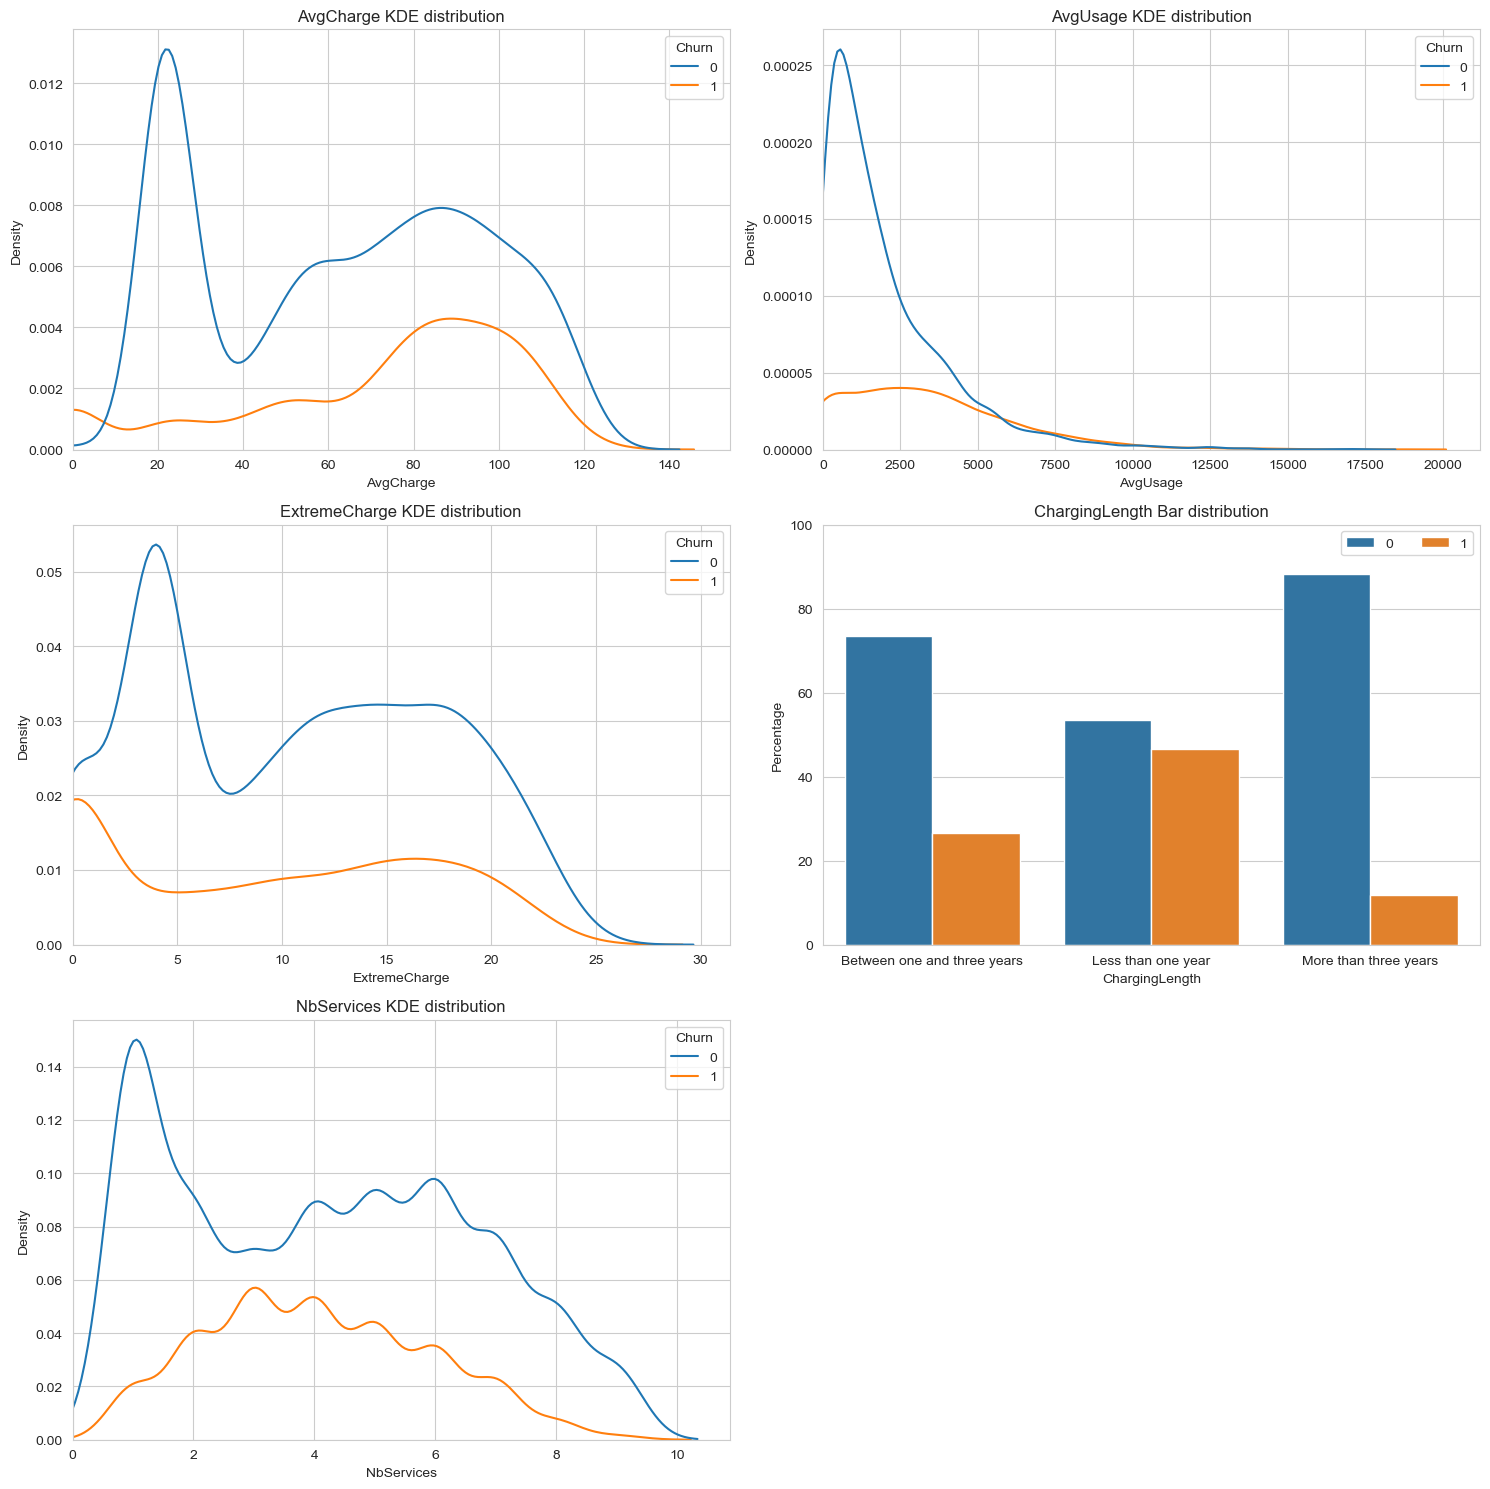

In [21]:
df = df_new.merge(X.merge(y, on='CustomerID'))
plot_features(df[list(df_new.columns) + ['Churn']].drop(['ContractID'], axis=1))

<font color='green'> 
    
### 1.2 Please, describe, motivate, and discuss your novel features, explorations and hypotheses

The next step is to extend the set of features with at least 5 novel behavioral features, coming from the phone usage, the services, and/or the charge. For the three corresponding CSV files, we can notice that they have more than $7.043$ rows, i.e., the number of customers in our data set. Therefore, we need to perform some data processing (e.g., aggregation) to compute feature values that can be associated to a single customer and be linked to the demographic data already present in X. Please, note that what we provide here is just an example set of behavioral features and that we plot distributions for numerical values for consistency and coherence.
    
**Discuss:**
To create the novel behavioral features, we thought about what characteristics hidden into the data may drive the churn event. In what follows, you find a list of five example behavioral features. Our hypotheses and observations on how they relate with the churn are provided in the subsequent section.    
* AvgCharge is the average amount of money a customer has been charged monthly.
* AvgUsage is the average level of phone usage a customer has experienced monthly. 
* ExtremeCharge is the difference between the maximum monthly charge and the average monthly charge associated with a customer. 
* ChargingLength identifies 3 customer categories based on charge entries (i.e., less than 1 year /, between 1 and 3 years / more than 3 years of charges). 
* NbServices is the number of different company services a customer is subscribed to.

**Hypotheses:**

In what follows, we provide some possible reasons that motivated us to include the above features to predict the churn event, and how they have been confirmed or impacted by the exploratory analysis made through the above plots.       
    
* AvgCharge: a reason for a customer to stay would be due to a low monthly charge, meaning that the service is affordable for them. This observation is confirmed by the supporting plot, given that most customer with a low charge do not churn.
* AvgUsage: customers with a very high phone usage may tend to churn less, given that they seem to be engaged with the company service. We made the hypothesis that customers may use the phone to a good extent because the service meets their needs and expectations. This observation is confirmed for high phone usage levels, while the churning density is quite stable for lower levels.   
* ExtremeCharge: customers whose average charge is close to their maximum tend to churn, meaning that their average charge is consistently high for them. This observation is confirmed to good extent by the supporting plot, which shows us that the density of churn events is higher for values around 0 (maximum and average charge are equal). 
* ChargingLength: customers who churn tend to try the company's services for a reasonable amount of time (e.g., one or two years) before deciding to drop, to realize that the company services do not meet their expectations. This observation is supported by the plot, which shows that there is a higher percentage of churning customers in contracts having between one and three years of charge entries. 
* NbServices: the more services the customer subscribed to, the more the customer is engaged with the company. Therefore, we made the hyphothesis that customers subscribed to a high number of services may have a lower rate of dropping. This observation is only partially confirmed by the plot, given that the higher rate of dropping is experienced by customers with three services, while it is far lower for customers with one or two services (a fine-grained counting of the services based on their type would help to delve more into this phenomenon). </font>

<a id="section2"></a>
## 2  Implement and evaluate a machine-learning approach appropriately. 
----

In this section, you should:
1. Choose and initialize a machine-learning model based on the task and the data set (and pre-process the features in X, **if necessary/appropriate**). 
2. Choose and run an evaluation method with appropriate performance metrics, based on the task and the data set. 
3. Report, interpret, and discuss the results achieved by your model appropriately, comparing against random and majority class predictions. 

<a id="section2.1"></a>
### Task 2.1

A range of machine-learning algorithms available in the field have been explored in the lectures and the lab sessions, and choosing the one you think that is most likely to perform best depends on your problem type and data. As you have seen in this course, certain algorithms are better suitable for regression tasks, while others for classification tasks, as an example. The data also plays a key role in the process of choosing the right algorithm for the right problem. Some algorithms can work with smaller sample sets, while others require lots of samples. Similarly, certain algorithms can work better with categorical data, while others work better with numerical input. Once you select the algorithm you will use for the next steps:
- you **could** pre-process here the features in `X` (**if necessary/appropriate**), in such a way that they are ready to be fed into the selected algorithm; 
- and then initialize the corresponding scikit-learn or statsmodel model to be ready to run the next steps on it.

*REMARK: please, note that pre-processing your data is NOT mandatory in the sense that you should pre-process the features in X only if necessary or appropriate, based on the model you chose and how it is able to deal with the data at hand. It is just important that you justify your decisions. Just in case you might need to encode categorical variables, as mentioned in lab session 3, scikit-learn has nice classes for this purpose, namely [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) or [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Another nice alternative is to use the [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) function of Pandas. We copy here again the reading mentioned in lab session 3 on these three encoding strategies: [this supporting tutorial](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd).*

Pre-process the features in X, in such a way that they are ready to be fed into the selected algorithm

In [33]:
def convert_to_datatypes(df):
    '''
    :param df: Original feature matrix
    :return: Preprocessed feature matrix
    '''
    
    # Copy the dataframe so that we do not inadvertently change the original version
    df = df.copy()
    
    # Identify and group continuous and categorical columns 
    continuous_cols = list(df._get_numeric_data().columns)
    categorical_cols = list(set(df.columns) - set(continuous_cols))
    
    # Identify and group binary and datetime features, separating them from the categorical ones
    binary_cols = [feat for feat in categorical_cols if df[feat].nunique() == 2]
    datetime_cols = [feat for feat in categorical_cols if 'Date' in feat]
    categorical_cols = list(set(categorical_cols) - set(binary_cols) - set(datetime_cols))
    
    # For each binary feature, map values to 0s and 1s
    for col in binary_cols:
        print("Binary", col, df[col].unique())
        df[col] = preprocessing.LabelEncoder().fit_transform(df[col])

    # For each categorical feature, assign a categorical type from categories arrays
    for col in categorical_cols:
        print("Categorical", col, df[col].unique())
        df[col] = pd.Categorical(df[col])
        
    # For each datetime feature, convert it to an integer which represents a cronological index  
    for col in datetime_cols:
        df[col] = df[col].apply(lambda x: time.mktime(datetime.datetime.strptime(x, '%Y-%m-%d').timetuple()))
    
    # Each categorical feature is converted into its corresponding one-hot encoding representation  
    df = pd.get_dummies(df)
    
    return df

In [34]:
df_preprocessed = convert_to_datatypes(df.drop(["ContractID","CustomerID"], axis=1).copy())

Binary PaperlessBilling ['No' 'Yes']
Binary Partner ['No' 'Yes']
Binary Gender ['Male' 'Female']
Binary Dependents ['No' 'Yes']
Categorical PaymentMethod ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Categorical ChargingLength ['Less than one year' 'Between one and three years'
 'More than three years']
Categorical Contract ['Month-to-month' 'Two year' 'One year']


In [30]:
df_preprocessed.sample(n=10)

,AvgCharge,AvgUsage,ExtremeCharge,NbServices,Gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,StartDate,...,ChargingLength_Between one and three years,ChargingLength_Less than one year,ChargingLength_More than three years,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
2577,62.732308,3409.084231,11.167692,5,0,0,0,0,1,1.406844e+09,...,0,0,1,0,0,0,1,0,0,1
743,108.455738,1114.005311,20.744262,7,1,0,0,0,0,1.417388e+09,...,0,0,1,0,0,1,0,0,1,0
5021,114.766667,4874.489500,12.783333,8,1,0,0,0,1,1.572563e+09,...,1,0,0,0,0,0,1,1,0,0
2155,89.650000,1986.145000,0.000000,3,1,0,1,0,1,1.596233e+09,...,0,1,0,0,0,1,0,1,0,0
2713,102.605634,5345.713127,19.494366,7,0,0,1,0,1,1.388531e+09,...,0,0,1,1,0,0,0,0,0,1
2717,120.829577,7338.176718,20.970423,9,1,0,1,0,1,1.388531e+09,...,0,0,1,1,0,0,0,0,0,1
5006,69.030435,2545.211000,12.669565,6,0,0,1,0,0,1.514761e+09,...,1,0,0,0,0,0,1,1,0,0
2965,67.653636,447.428364,14.596364,6,0,0,1,0,1,1.433110e+09,...,0,0,1,0,1,0,0,0,1,0
5913,75.483333,5321.467500,14.366667,3,1,0,0,1,1,1.575155e+09,...,1,0,0,0,1,0,0,1,0,0
2025,109.300704,1775.389070,20.849296,7,1,0,1,1,1,1.388531e+09,...,0,0,1,0,1,0,0,0,1,0


In [35]:
X_numpy = df_preprocessed.drop(['Churn'], axis=1).to_numpy()
y_numpy = df_preprocessed['Churn'].to_numpy().reshape(-1)

In [36]:
X_numpy.shape, y_numpy.shape

((7043, 20), (7043,))

Initialize the corresponding scikit-learn or statsmodel model to be ready to run the next steps on it.

In [37]:
clf = ensemble.RandomForestClassifier()

<font color='green'>
    
### 2.1 Please, describe, motivate, and discuss all your decisions on the pre-processing (if any) and the model.
    
In this task, we need to make a decision on the classifier which might suit the best the presented task, and provide some supporting justifications. Once we make our decision, we need to consider whether our features can be directly fed into the selected classifier, and perform the necessary/appropriate pre-processing tasks otherwise. The data pre-processing should be aligned with the selected classifier. Finally, we just need to initialize the scikit-learn classifier. In this way, the classifier and the data are ready for the subsequent evaluation step.   

In this example solution, we opted for a Random Forest classifier, due to the fact that it can identify non-linear boundaries and provide us with high flexibility with respect to the considered features. Specifically, RandomForests can manage different types of features effectively and efficiently and do not require any scaling (this aspect might be important in our scenario, given that our feature set includes several numerical features with different scales). Consequently, our experimental pipeline has a lighter pre-processing phase. This phase just requires us to transform string categorical values into integers in such a way that they can be fed into the scikit-learn classifier. Specifically, binary features are mapped into 0s and 1s, while features including more than two categories are subjected to a one-hot encoding (not a label encoding). While this is not strictly required to fit a RandomForest, it is conceptually better due to the fact that the numeric values are not misinterpreted as having some sort of order in them (this last step is optional and considered as a refinement pre-processing). Please, note also that dates are converted into their corresponding Unix timestamps to implicitly encode information about the contract lenght and to make the feature ready to be fed into the classifier during training and prediction.   

</font>

<a id="section2.2"></a>
### Task 2.2

So, you should have successfully initialized your machine-learning model. What should you do now? You will need to evaluate the goodness of the model in predicting the target, which is an essential part of the entire pipeline. When to use which evaluation method and performance metric(s) depends primarily on the nature of your problem and the characteristics of the data. Getting back to your homework, question yourself what is the main purpose you are trying to solve, select the right performance metrics and evaluation method, and run the evaluation of your model accordingly. In this task, we ask you to run an appropriate evaluation method and compute appropriate performance metric(s), among those described in the lectures and in the lab sessions.

Before deciding, we print the percentage of churn labels.

In [38]:
np.count_nonzero(y_numpy) / len(y_numpy)

0.2653698707936959

Once we decided the evaluation method and performance metric(s), we need to implement our evaluation:

In [39]:
param_grid = {'n_estimators': [2, 50, 100], 'max_depth': [2, 50, 100], 'max_features': ['sqrt', None]}
cv = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

For convenience, we will use a dictionary with one entry per metric and a nested dictionary for the metric scores for each classifier.  

In [40]:
metrics = {'BalancedAccuracy': {}, 'AUC': {}}

Elegant way with grid search and compact cross-validation:

In [41]:
gclf = model_selection.GridSearchCV(clone(clf), param_grid, cv=10, scoring='roc_auc') 
%time cv_result = model_selection.cross_validate(gclf, X_numpy, y_numpy, cv=cv, scoring=['roc_auc', 'balanced_accuracy'])

CPU times: user 9min 11s, sys: 12.1 s, total: 9min 23s
Wall time: 9min 23s


In [42]:
metrics['AUC']['RandomForest'] = cv_result['test_roc_auc']
metrics['BalancedAccuracy']['RandomForest'] = cv_result['test_balanced_accuracy']

Example alternative with grid search and separate cross-validation per metric.  

Other alternatives would have been possible (e.g., with cross_val_score, without grid search, and/or with for loops across folds). 

<font color='green'> 

### 2.2 Please, describe, motivate, and discuss the evaluation method and performance metrics you selected
    
Once you reach this task, you should have initialized the selected classifier, and the features and the target variable arrays should be ready to be fed into the classifier, during training and testing. Now, it is the time to select an appropriate evaluation method and appropriate performance metric(s), based on the characteristics of the data set at hand. The answers may vary based on what metric you choose and how you calculate it, and we have considered whether you have properly justified your decisions and whether the evaluation method and performance metrics have been correctly implemented. An important element was to align your decisions to the characteristics of the data and the task. The fine-tuning of the classifier has been appreciated but not required to get points in this task (we just show you an example of a toy fine-tuning with the AUC as a scoring function due to its robustness against imbalance, made with a nested level of cross-validation for illustration). 
    
In this example solution, we have decided to use a 10-fold user-stratified target-stratified cross-validation, given that the data set is relatively small and suffers from an imbalance label representation. In this case, 10 folds would ensure that the training fold will include a reasonable number of churn cases to learn from, with respect to a 5-fold setup. We opted for a user-level stratification because the company would be more interested in understanding whether the classifier can generalize to new users (differently from an item-level stratification, where we put apart a portion of data for each user for testing). Finally, we need to ensure that the stratification takes into account the imbalanced setting, and this is why folds are stratified also with respect to the representation of each label (churn and not churn). The folds are made by preserving the percentage of samples for each class. AUC and Balanced Accuracy are selected as performance metrics in this example solution. On one hand, the AUC score is very robust to class imbalance and would give us a general idea of the performance achieved by the classifier. On the other hand, it can be harder to interpret for the stakeholders involved around the churn prediction task. Therefore, the performance metrics include also Balanced Accuracy, which is easily interpretable and more robust to class imbalance than plain Accuracy. We can conclude that taking a look at both of AUC and Balanced Accuracy can allow us to have a better understanding of the classifier's performance.   
    
Please, note that we have instantiated the StratifiedKFold object only once, to ensure that all the experiments are run on the same folds. Setting random_state=0 will ensure that our results will be replicable. 
</font>

<a id="section2.3"></a>
### Task 2.3

Selecting the right performance metrics and evaluation method and running the evaluation of your model accordingly is not enough. To assess the model goodness, you need to report and communicate the results of your model appropriately (e.g., deciding which performance metrics you present and how you to present them). The way you perform this task should be coherent with the problem type you are dealing with, the characteristics of the data set, and what is important in the target context. In this task we ask you to 1) report the obtained results visually, and 2) interpret and discuss them with respect to the performance achievable by a random model and by a model which always predicts the majority class.

In [24]:
dummyclf = DummyClassifier(random_state=0, strategy='uniform')
metrics['AUC']['DummyRandom'] = model_selection.cross_val_score(dummyclf, X_numpy, y_numpy, cv=cv, scoring='roc_auc')
metrics['BalancedAccuracy']['DummyRandom'] = model_selection.cross_val_score(dummyclf, X_numpy, y_numpy, cv=cv, scoring='balanced_accuracy')

In [25]:
dummyclf = DummyClassifier(random_state=0, strategy='most_frequent')
metrics['AUC']['DummyMajority'] = model_selection.cross_val_score(dummyclf, X_numpy, y_numpy, cv=cv, scoring='roc_auc')
metrics['BalancedAccuracy']['DummyMajority'] = model_selection.cross_val_score(dummyclf, X_numpy, y_numpy, cv=cv, scoring='balanced_accuracy')

Error bars. 

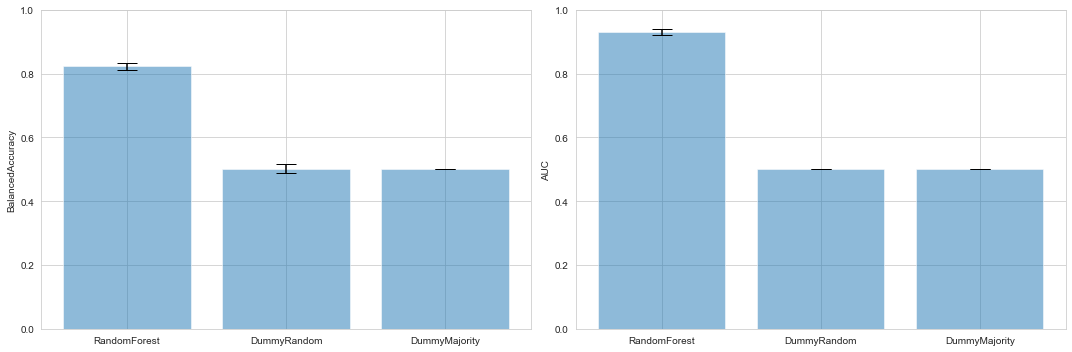

In [26]:
plt.figure(figsize=(15, 5))

for m_id, metric in enumerate(metrics.keys()):
    
    # Create the subplot for the current metric
    plt.subplot(1, 2, m_id + 1)

    # Compute means, standard deviations, and labels
    means, yerrs, labels = [], [], []
    for model, model_scores in metrics[metric].items():
        means.append(np.mean(model_scores))
        yerrs.append(np.std(model_scores))
        labels.append(model)
    
    # Plot values
    x_pos = np.arange(len(labels))
    plt.bar(x_pos, means, yerr=yerrs, align='center', alpha=0.5, ecolor='black', capsize=10)
    
    # Make decorations
    plt.xticks(x_pos, labels)
    plt.ylabel(metric)
    plt.ylim(0, 1)

plt.tight_layout()
plt.show()

<font color='green'> 

### 2.3 Please, describe, motivate, interpret, and discuss the results
    
In this task, the answer may vary based on what metric you choose and how you do visualization. Generally, we expect that you provide visualizations that can enable an easy comparison of the classifier with respect to the two baseline classifiers, the correct implementation of the underlying source code, and an appropriate interpretation of the result. 

In this example solution, we have select a 10-fold user-stratified target-stratified cross-validation as an evaluation method, and AUC and Balanced Accuracy as performance metrics. Given that the data set is relatively small, the performance of the classifier could greatly vary across folds, and showing the average value of the metric across folds is not enough. Therefore, we opted for a range of error bars for each performance metric. To ease the comparison across our classifier and the baseline classifiers, we included the two baseline classifiers in the same plot. 
    
Based on the results, we can observe that both Balanced Accuracy and AUC scores are quite stable across folds (see the error bars for the Random Forest on both plots). This finding means that our classifier's performance does not highly depend on the samples included in the test fold and might show good generalization performance on unseen users. Furthermore, the Balanded Accuracy scores shed light on the fact that our classifier appears to be able to correctly classify a customer in around 80% of the times - this can be considered a good starting point, but more exploration on the recall for each class would be needed.  The AUC is around 90%, so significantly higher with respect to the AUC of the random and majority class model). Certainly, the RandomForest's performance is significantly better with respect to that of a model which predicts always the majority class or of a model which predicts the churn class randomly - note that both baselines achieve a score of 0.5 in both Balanced Accuracy (for the DummyMajority, 100% of accuracy on the majority class and 0% of accuracy on the minority class, thus obtaining 50% of accuracy of average; for DummyRandom, we observed 50% of accuracy for each class) and AUC similarly, proving the robustness of these performance metrics to extreme cases. 
    
Note that the error bar for DummyRandom is not flat due to the fact that the representation of the two labels in the training and test set may slightly differ. Furthermore, DummyClassifiers have been appreciated but not required to get full points. 

</font>